

# Project: Investigate a Dataset - (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.



### Question(s) for Analysis
Which genres are most popular from year to year?

What kinds of properties are associated with movies that have high revenues?

In [1]:
#  import statements for all  of the packages that we plan to use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties


In [2]:
# Load dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.shape

(10866, 21)

Data consist of 10866 different movie and 21 columns

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning


cleaninig data
which is not neccessary for our analysis

In [6]:
# drop unneccessary columns
df.drop(['release_date', 'overview', 'homepage', 'imdb_id', 'tagline', 'budget_adj', 'revenue_adj','keywords','budget','runtime'], axis = 1, inplace = True)
df.head(1)

,id,popularity,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


we dropped some columns like "imdb_id" because it has many duplicated ids so we decided just to use the id column

In [7]:
# search for duplicated values
df[df.duplicated()]

,id,popularity,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
2090,42194,0.59643,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [8]:
# drop duplicated
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

Dropped duplicated values

In [10]:
# searching null values
df.isna().sum()

id                         0
popularity                 0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [11]:
# drop null values
df.dropna(inplace = True)

In [12]:
df.isna().sum()

id                      0
popularity              0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

Dropped NaN values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 916.1+ KB


get the mean of revenue and fill zeros with it

In [15]:
df['revenue'].mean()    

44231208.89357348

search for zeros values and deal with it

In [16]:
df_zeros = df[df == 0]
df_zeros.query('revenue == 0')

,id,popularity,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
48,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10861,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10862,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10863,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10864,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
 df['revenue'].replace(0 ,44231208.89,inplace =True)

In [19]:
df.query(' revenue == 0.0').count()

id                      0
popularity              0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

we have done with fill zeros values with mean of revenue

In [20]:
df.shape

(9772, 11)

In [21]:
df.describe()

,id,popularity,revenue,vote_count,vote_average,release_year
count,9772.000000,9772.000000,9.772000e+03,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,6.696239e+07,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,1.162142e+08,603.011504,0.913174,13.036794
min,5.000000,0.000188,2.000000e+00,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,3.526309e+07,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,4.423121e+07,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,4.423121e+07,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,2.781506e+09,9767.000000,8.700000,2015.000000


In [22]:
df['revenue']

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
             ...     
10861    4.423121e+07
10862    4.423121e+07
10863    4.423121e+07
10864    4.423121e+07
10865    4.423121e+07
Name: revenue, Length: 9772, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis
Now that we've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that i posed in the Introduction section


### General look

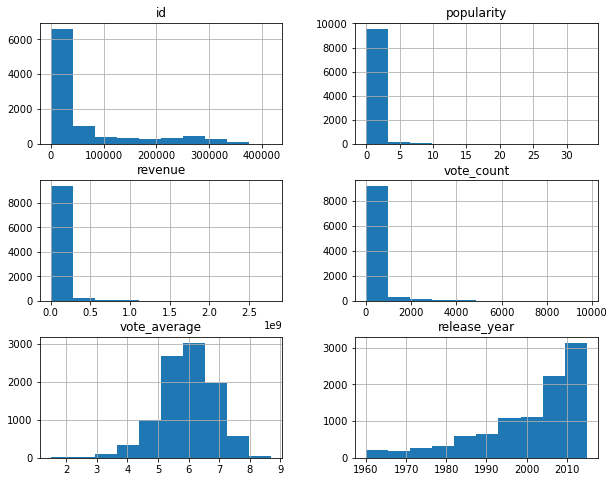

In [52]:
df.hist(figsize=(10,8));

<a id='eda'></a>
### Research Question 1 (Which genres are most popular from year to year?)

we will search for the unique genres to sort it by popuarity

In [23]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

as we see its need to extract each single genre to count it

In [24]:
# extract genres of movies
df_genres = df['genres'].str.get_dummies(sep ='|')
df_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10862,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10863,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10864,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


we will count each single genre that repeated on movies 

In [25]:
# the most popular genres
df_genres_sum =df_genres.sum()
df_genres_sum

Action             2235
Adventure          1384
Animation           617
Comedy             3433
Crime              1299
Documentary         317
Drama              4364
Family             1095
Fantasy             840
Foreign             120
History             306
Horror             1526
Music               339
Mystery             773
Romance            1570
Science Fiction    1136
TV Movie            132
Thriller           2746
War                 258
Western             160
dtype: int64

after counted each genre we will sort it to make a vizualization to show which one is the most

In [26]:
sorted_genres = df_genres.sum().reset_index()
sorted_genres.sort_values(by = 0,ascending = False)

,index,0
6,Drama,4364
3,Comedy,3433
17,Thriller,2746
0,Action,2235
14,Romance,1570
11,Horror,1526
1,Adventure,1384
4,Crime,1299
15,Science Fiction,1136
7,Family,1095


bar plot of genres over years

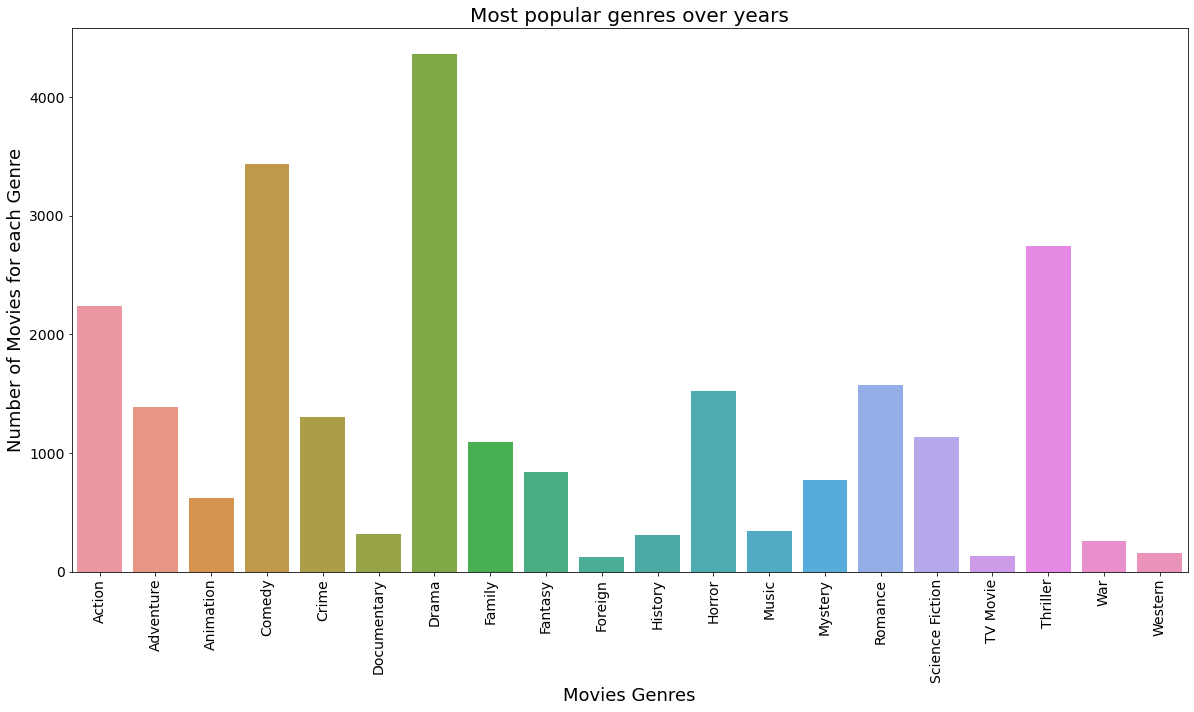

In [91]:
def barPlot(x, y, data, title, xlabel,ylabel,palette):
    
    plt.figure(figsize=(20,10))
    sns.barplot(x = x, y = y, data = data,palette = palette)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation = 90, fontsize = 14)
    plt.yticks(fontsize=14)
    plt.show(); 
barPlot(df_genres.columns, df_genres.sum(), sorted_genres, "Most popular genres over years", "Movies Genres", "Number of Movies for each Genre",None)

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

we will search the correlation between some of things that may affect the revenue 

but first we will sort a copy of our df by revenue desceinding 

we will focus on the top 10 movies have high revenue

In [29]:
# focus on revenue
sorted_revenue = df.sort_values(by = 'revenue',ascending = False)

sorted_revenue.head(10)

,id,popularity,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
1386,19995,9.432768,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009
3,140607,11.173104,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
5231,597,4.355219,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997
4361,24428,7.637767,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012
0,135397,32.985763,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
4,168259,9.335014,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
14,99861,5.944927,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015
3374,12445,5.711315,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011
5422,109445,6.112766,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013
5425,68721,4.946136,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Action|Adventure|Science Fiction,Marvel Studios,6882,6.9,2013


a heatmap for the correlation of dataset

In [30]:
sr_crr = sorted_revenue.corr()

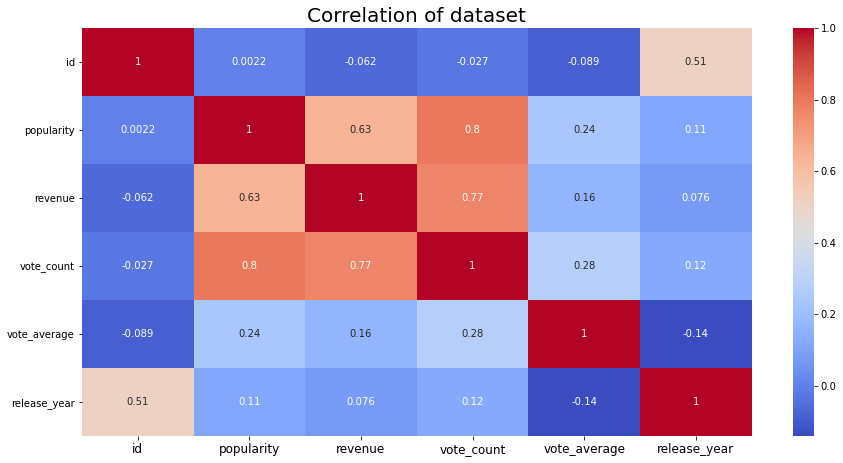

In [32]:
plt.figure(figsize=(15,7.5))
sns.heatmap(sr_crr,cmap = 'coolwarm', annot = True)
plt.title('Correlation of dataset',fontsize=20)
plt.xticks(fontsize = 12)
plt.show()

Search the correlation between director and revenue

In [33]:
dir_rev = sorted_revenue[['revenue','director']].head(10)
dir_rev

,revenue,director
1386,2.781506e+09,James Cameron
3,2.068178e+09,J.J. Abrams
5231,1.845034e+09,James Cameron
4361,1.519558e+09,Joss Whedon
0,1.513529e+09,Colin Trevorrow
4,1.506249e+09,James Wan
14,1.405036e+09,Joss Whedon
3374,1.327818e+09,David Yates
5422,1.274219e+09,Chris Buck|Jennifer Lee
5425,1.215440e+09,Shane Black


bar plot about the higher directors movies revenue

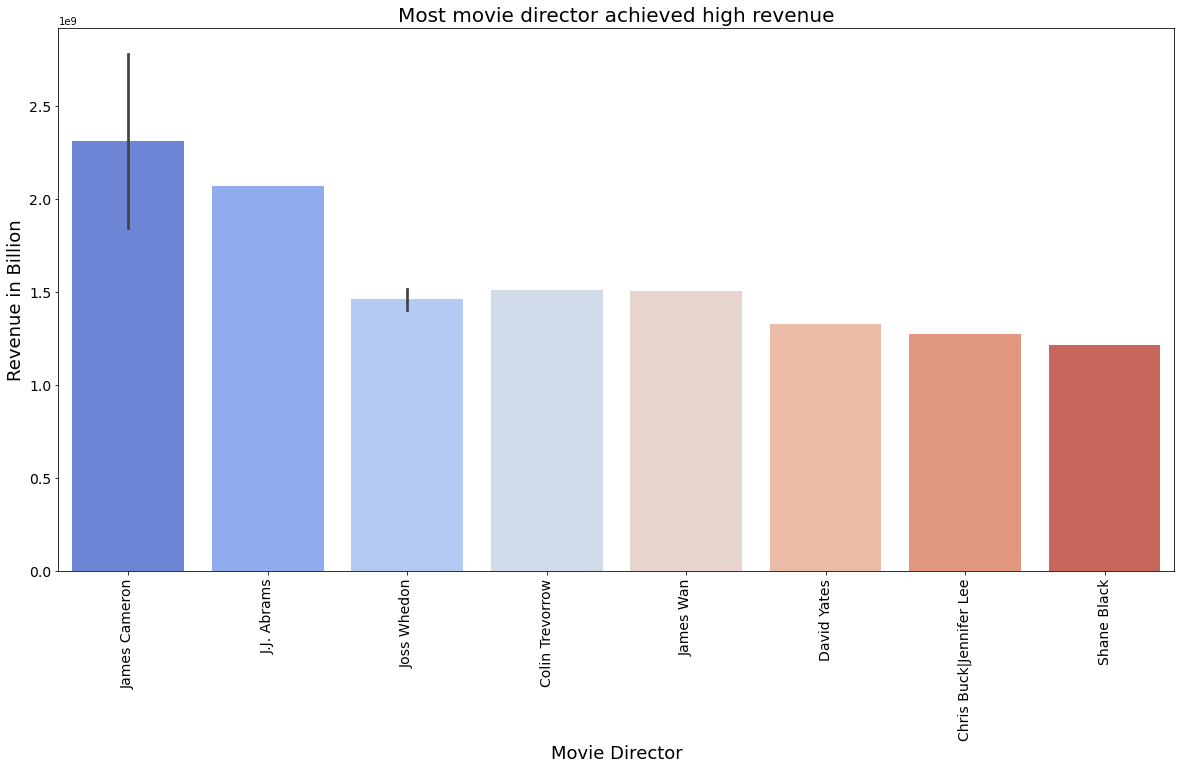

In [92]:
barPlot('director', 'revenue', dir_rev, "Most movie director achieved high revenue", "Movie Director", "Revenue in Billion",'coolwarm')

The top 10 directors has directed the many number of movies

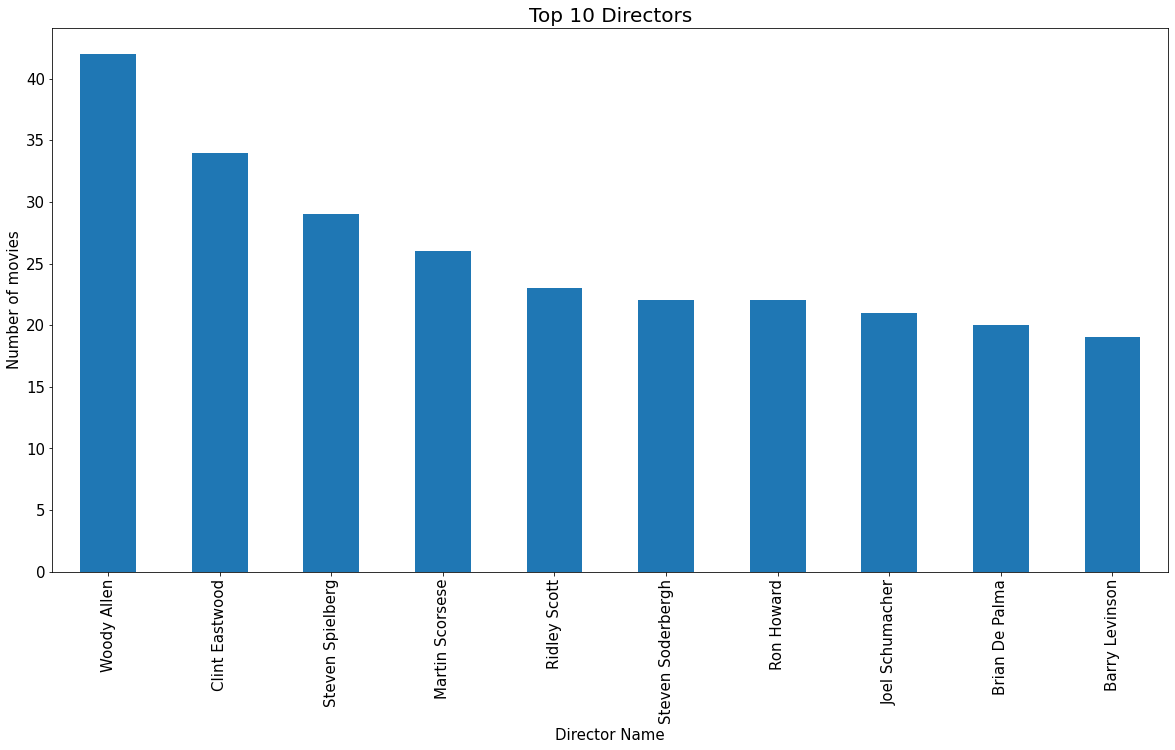

In [94]:
df['director'].value_counts().head(10).plot.bar(figsize=(20,10));
plt.title('Top 10 Directors',fontsize=20)
plt.ylabel('Number of movies',fontsize=15)
plt.xlabel('Director Name',fontsize=15)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(fontsize=15);

table for top 10 movies revenue and its genres

In [114]:
mo_rev = sorted_revenue[['original_title', 'revenue','genres','popularity']].head(10)
mo_rev

,original_title,revenue,genres,popularity
1386,Avatar,2.781506e+09,Action|Adventure|Fantasy|Science Fiction,9.432768
3,Star Wars: The Force Awakens,2.068178e+09,Action|Adventure|Science Fiction|Fantasy,11.173104
5231,Titanic,1.845034e+09,Drama|Romance|Thriller,4.355219
4361,The Avengers,1.519558e+09,Science Fiction|Action|Adventure,7.637767
0,Jurassic World,1.513529e+09,Action|Adventure|Science Fiction|Thriller,32.985763
4,Furious 7,1.506249e+09,Action|Crime|Thriller,9.335014
14,Avengers: Age of Ultron,1.405036e+09,Action|Adventure|Science Fiction,5.944927
3374,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09,Adventure|Family|Fantasy,5.711315
5422,Frozen,1.274219e+09,Animation|Adventure|Family,6.112766
5425,Iron Man 3,1.215440e+09,Action|Adventure|Science Fiction,4.946136


a bar plolt for the top 10 movies achieved revenue over years

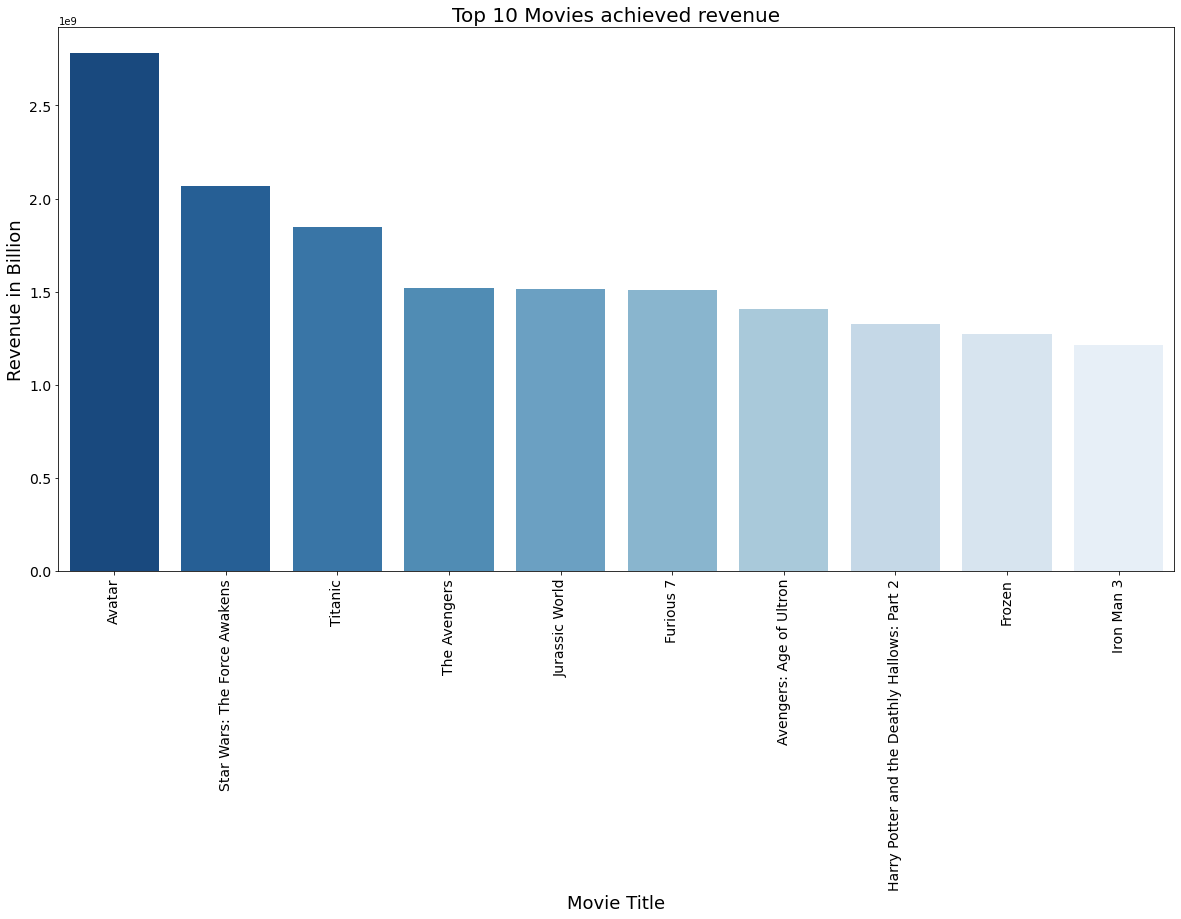

In [95]:
barPlot('original_title','revenue', mo_rev,"Top 10 Movies achieved revenue", "Movie Title", "Revenue in Billion","Blues_r")

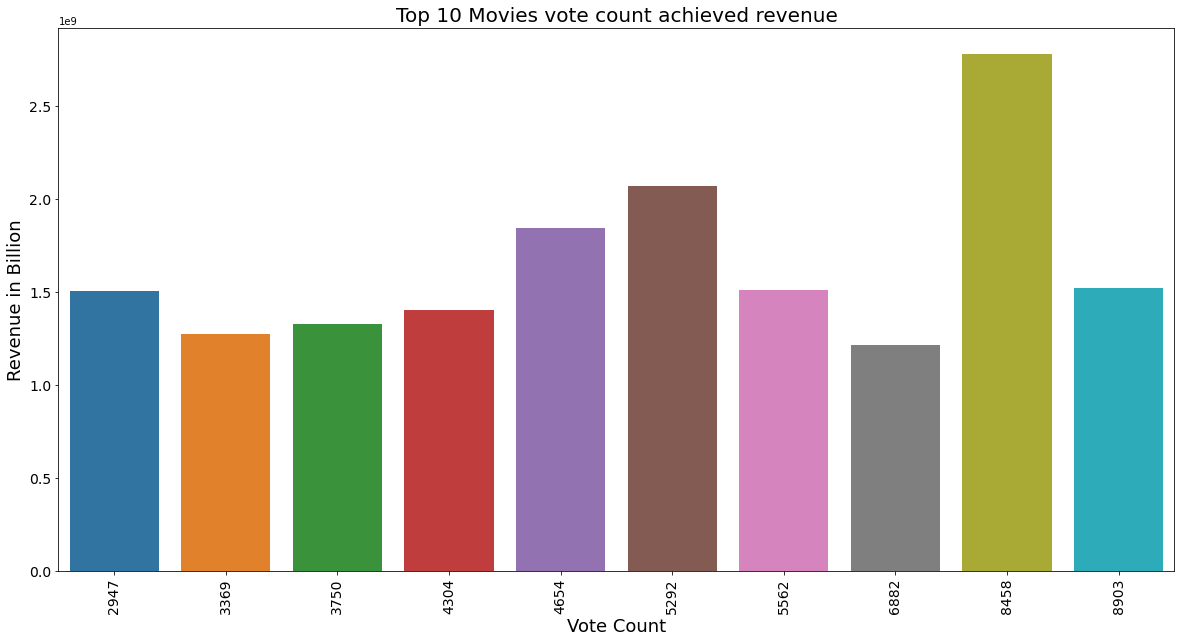

In [105]:
mov_vote = sorted_revenue[['original_title', 'revenue','vote_count']].head(10)
barPlot('vote_count','revenue', mov_vote,"Top 10 Movies vote count achieved revenue", "Vote Count", "Revenue in Billion",None)

we could notice here that the high voted has the high revenue 

The top 15 number of movies produced per year

In [111]:
df['release_year'].value_counts().head(15)

2014    635
2013    567
2015    558
2012    498
2009    474
2011    456
2008    441
2010    420
2007    389
2006    350
2005    323
2003    254
2004    253
2002    241
2001    212
Name: release_year, dtype: int64

and here a count plot explain the movies produced every yeay over the years

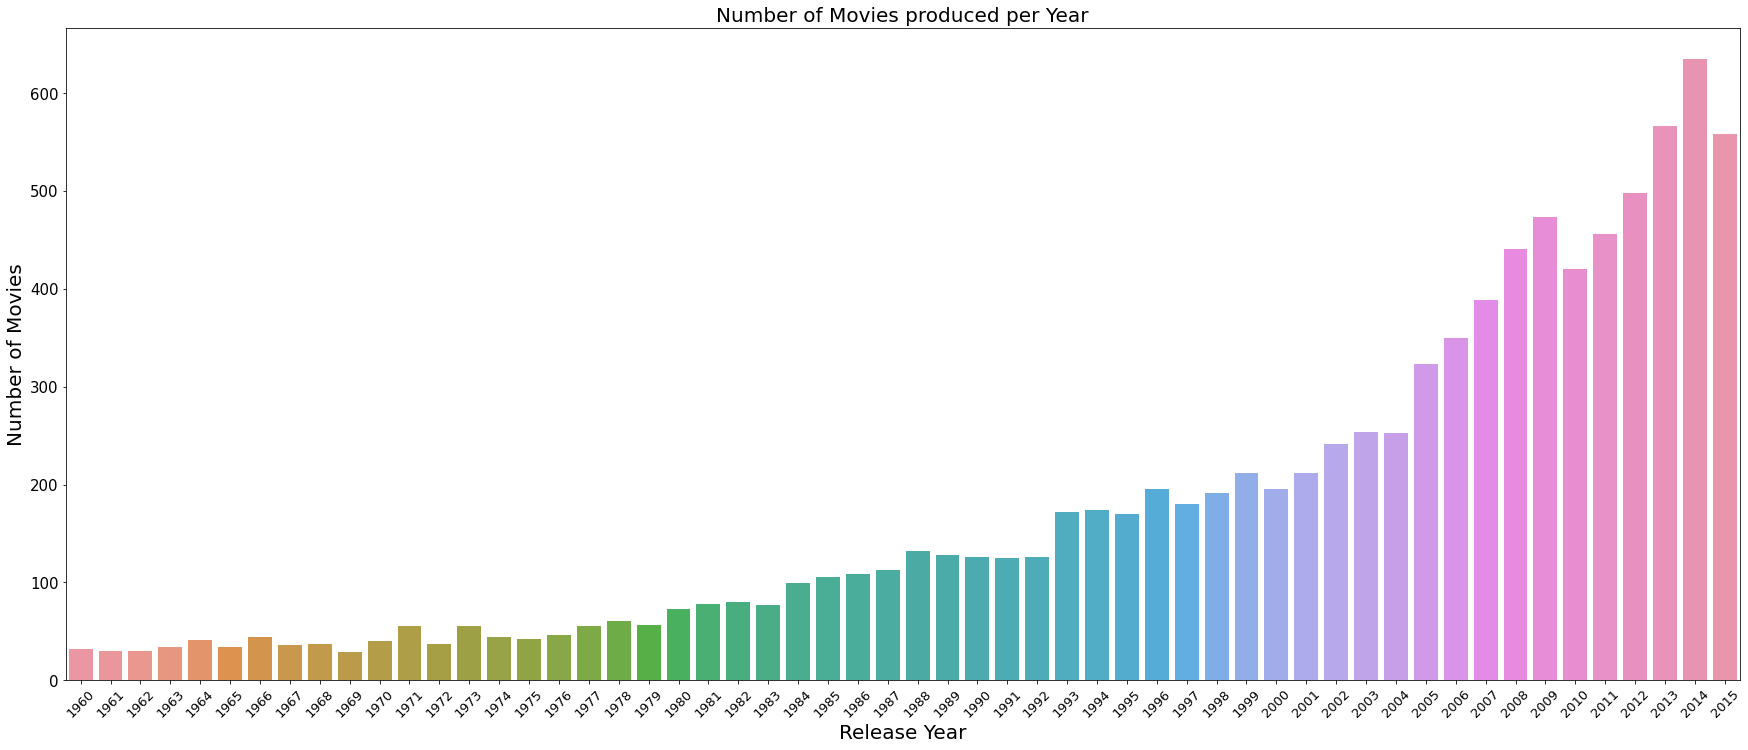

In [115]:
    plt.figure(figsize=(30,12))
    sns.countplot(x=df['release_year'])
    plt.title('Number of Movies produced per Year', fontsize=20)
    plt.xlabel('Release Year',fontsize=20)
    plt.ylabel('Number of Movies', fontsize=20)
    plt.xticks(rotation=45,fontsize=13)
    plt.yticks(fontsize=15)
    plt.show()

we could notice that movies production incredible increased from year to year till 2015, and the peak of production was in 2014 

<a id='conclusions'></a>
## Conclusions

from the dataset we found that we have about 20 different
of genres through years 
the most popular genres is showed was :

**1st Darama, 2nd Comedy, 3rd Thriller and 4th is the Action genre**

thats reflect people prefer movies like avengers, avatar ..etc more than Documentry 


we searched for several things and found that:
        **the high revenue related to some directors thier movies achived high revenue**
        regardless number of movies has been directed 
        we found **"James Cameron"** have the most high revenue

and another thing that some of genres have high revenue:
        like **Action, Adventure, Fantasy, Science-Fiction, Drama**
and the movies with high revenue related to thats genres
**Avater, Titanic, Avengers**

the number of movies per year increased per years
and the most year recorded the peak is "2014"

## Limitation

No clear correlation between movies popularity and its revenue, that notice popularit doesn't affect the revenue of movies


In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1